# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [34]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [35]:
passengers = pd.read_csv("sample_data/titanic.csv", index_col="PassengerId")
passengers



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Выведете первые 7 строк набора.

In [36]:
print("Первые 7 строк набора данных:")
passengers.head(7)

Первые 7 строк набора данных:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [37]:
# Выводим информацию о типах данных в наборе
print("Информация о типах данных:")
passengers.info()

# Проверяем нечисловые признаки
non_numeric_columns = passengers.select_dtypes(include=['object']).columns
print(f"\nНечисловые признаки ({len(non_numeric_columns)}):")
for col in non_numeric_columns:
    print(f"- {col}")

# Проверяем наличие значений null
print(f"\nПропущенные значения (null):")
null_counts = passengers.isnull().sum()
null_columns = null_counts[null_counts > 0]
if len(null_columns) > 0:
    for col, count in null_columns.items():
        print(f"- {col}: {count} пропущенных значений")
else:
    print("Пропущенных значений нет")

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

Нечисловые признаки (5):
- Name
- Sex
- Ticket
- Cabin
- Embarked

Пропущенные значения (null):
- Age: 177 пропущенных значений
- Cabin: 687 пропущенных значений
- Embarked: 2 пропущенных значений


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [38]:
# Удаляем нечисловые признаки, которые не влияют на выживаемость
columns_to_drop = ['Name', 'Ticket', 'Cabin']
passengers_cleaned = passengers.drop(columns=columns_to_drop)
print(passengers_cleaned.head())

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [39]:
# Создаем два новых бинарных признака на основе столбца Sex
passengers_cleaned['male'] = (passengers_cleaned['Sex'] == 'male').astype(int)
passengers_cleaned['female'] = (passengers_cleaned['Sex'] == 'female').astype(int)

# Удаляем исходный столбец Sex, так как он больше не нужен
passengers_cleaned = passengers_cleaned.drop('Sex', axis=1)

# Проверяем результат
print("После создания бинарных признаков и удаления столбца Sex:")
passengers_cleaned.head(10)

После создания бинарных признаков и удаления столбца Sex:


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1,0
2,1,1,38.0,1,0,71.2833,C,0,1
3,1,3,26.0,0,0,7.9250,S,0,1
4,1,1,35.0,1,0,53.1000,S,0,1
5,0,3,35.0,0,0,8.0500,S,1,0
6,0,3,NaN,0,0,8.4583,Q,1,0
7,0,1,54.0,0,0,51.8625,S,1,0
8,0,3,2.0,3,1,21.0750,S,1,0
9,1,3,27.0,0,2,11.1333,S,0,1


6. Удалите строки, которые содержать хотя бы одно null значение.

In [40]:
passengers_cleaned = passengers_cleaned.dropna()
print(f"\nОстались ли null значения в данных: {passengers_cleaned.isnull().sum().sum()}")


Остались ли null значения в данных: 0


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [41]:
from sklearn.preprocessing import MinMaxScaler
# Нормализуем значения признака "Fare"
scaler = MinMaxScaler()
passengers_cleaned['Fare'] = scaler.fit_transform(passengers_cleaned[['Fare']])
print("Признак Fare после нормализации:")
print(passengers_cleaned['Fare'].head())

Признак Fare после нормализации:
PassengerId
1    0.014151
2    0.139136
3    0.015469
4    0.103644
5    0.015713
Name: Fare, dtype: float64


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [42]:
# Находим средние значения Fare для погибших и выживших пассажиров
mean_fare_survived = passengers_cleaned[passengers_cleaned['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = passengers_cleaned[passengers_cleaned['Survived'] == 0]['Fare'].mean()

# Вычисляем разницу
fare_difference = mean_fare_survived - mean_fare_not_survived

print(f"Среднее значение Fare для выживших: {mean_fare_survived}")
print(f"Среднее значение Fare для погибших: {mean_fare_not_survived}")
print(f"Разница между средними значениями: {fare_difference}")

Среднее значение Fare для выживших: 0.100809541745815
Среднее значение Fare для погибших: 0.04482558551791412
Разница между средними значениями: 0.05598395622790087


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

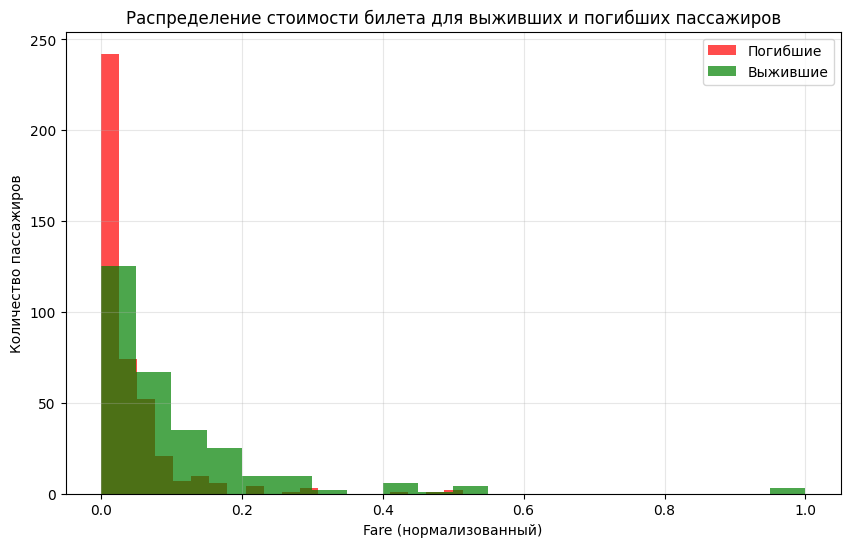

In [43]:
# Строим гистограммы для выживших и погибших на одной оси
plt.figure(figsize=(10, 6))

# Гистограмма для погибших (Survived = 0)
plt.hist(passengers_cleaned[passengers_cleaned['Survived'] == 0]['Fare'],
         alpha=0.7, label='Погибшие', bins=20, color='red')

# Гистограмма для выживших (Survived = 1)
plt.hist(passengers_cleaned[passengers_cleaned['Survived'] == 1]['Fare'],
         alpha=0.7, label='Выжившие', bins=20, color='green')

plt.xlabel('Fare (нормализованный)')
plt.ylabel('Количество пассажиров')
plt.title('Распределение стоимости билета для выживших и погибших пассажиров')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [44]:
X = passengers_cleaned.drop('Survived', axis=1)
y = passengers_cleaned['Survived']
print(f"\nПервые 5 строк набора признаков X:")
print(X.head())
print(f"\nПервые 10 значений целевой переменной y:")
print(y.head(10))


Первые 5 строк набора признаков X:
             Pclass   Age  SibSp  Parch      Fare Embarked  male  female
PassengerId                                                             
1                 3  22.0      1      0  0.014151        S     1       0
2                 1  38.0      1      0  0.139136        C     0       1
3                 3  26.0      0      0  0.015469        S     0       1
4                 1  35.0      1      0  0.103644        S     0       1
5                 3  35.0      0      0  0.015713        S     1       0

Первые 10 значений целевой переменной y:
PassengerId
1     0
2     1
3     1
4     1
5     0
7     0
8     0
9     1
10    1
11    1
Name: Survived, dtype: int64


## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [45]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Проверяем размерности полученных выборок
print(f"Обучающая выборка: {X_train.shape[0]}")
print(f"Тестовая выборка: {X_test.shape[0]}")
print(f"Соотношение: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]) * 100:.1f}% / {X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]) * 100:.1f}%")

Обучающая выборка: 534
Тестовая выборка: 178
Соотношение: 75.0% / 25.0%


9. Выполните обучение модели.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('sample_data/titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# One-hot кодирование 'Sex'
sex_dummies = pd.get_dummies(df['Sex'])

# One-hot кодирование 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df.drop(columns=['Sex', 'Embarked']), sex_dummies, embarked_dummies], axis=1)

# Удаляем строки с пропусками
df = df.dropna()

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Модель обучена успешно!")

Модель обучена успешно!


## Проверка модели

10. Выведите мартицу ошибок

In [47]:
from sklearn.metrics import confusion_matrix

# Получаем предсказания модели на тестовых данных
y_pred = model.predict(X_test)
# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[90 17]
 [26 46]]


11. Расчитайте accuracy

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.7597765363128491


12. Сделайте вывод о полученном результате

Вывод: данные Titanic были подготовлены для анализа: удалены неинформативные текстовые признаки, категориальные признаки Sex и Embarked преобразованы в числовой формат, а Fare нормализован. Датасет разделили на обучающую и тестовую выборки, после чего обучена логистическая регрессия для предсказания выживания пассажиров. Анализ показал, что пассажиры с более высокой оплатой билета имели больше шансов выжить. Проверка модели с помощью матрицы ошибок показала её способность правильно классифицировать выживших и погибших, что позволяет использовать её для дальнейшего анализа и улучшения предсказаний.

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.